# Detection and Classification of bone fracture Based on Machine Learning Techniques

### Methodology 
1. Preprocessing
    - **Gaussian** Filter for removing salt and pepper noise
    - **Adaptive Histogram equalization** used for Brightness, Darkness and Contrast Noise adjustments.
    - **Canny** Edge Detection
2. Feature Extraction
    - GLCM
3. ML Algorithms
    - SVM Algorithm
    - Decision Tree Algorithm
    - Naive Bayes Algorithm
    - Random Forest Algorithm
    - Nearest Neighbors Algorithm
4. DL Algorithms
    - CNN
    - VGG16


# 1. Preprocessing

## 1.1 Gaussian Filter

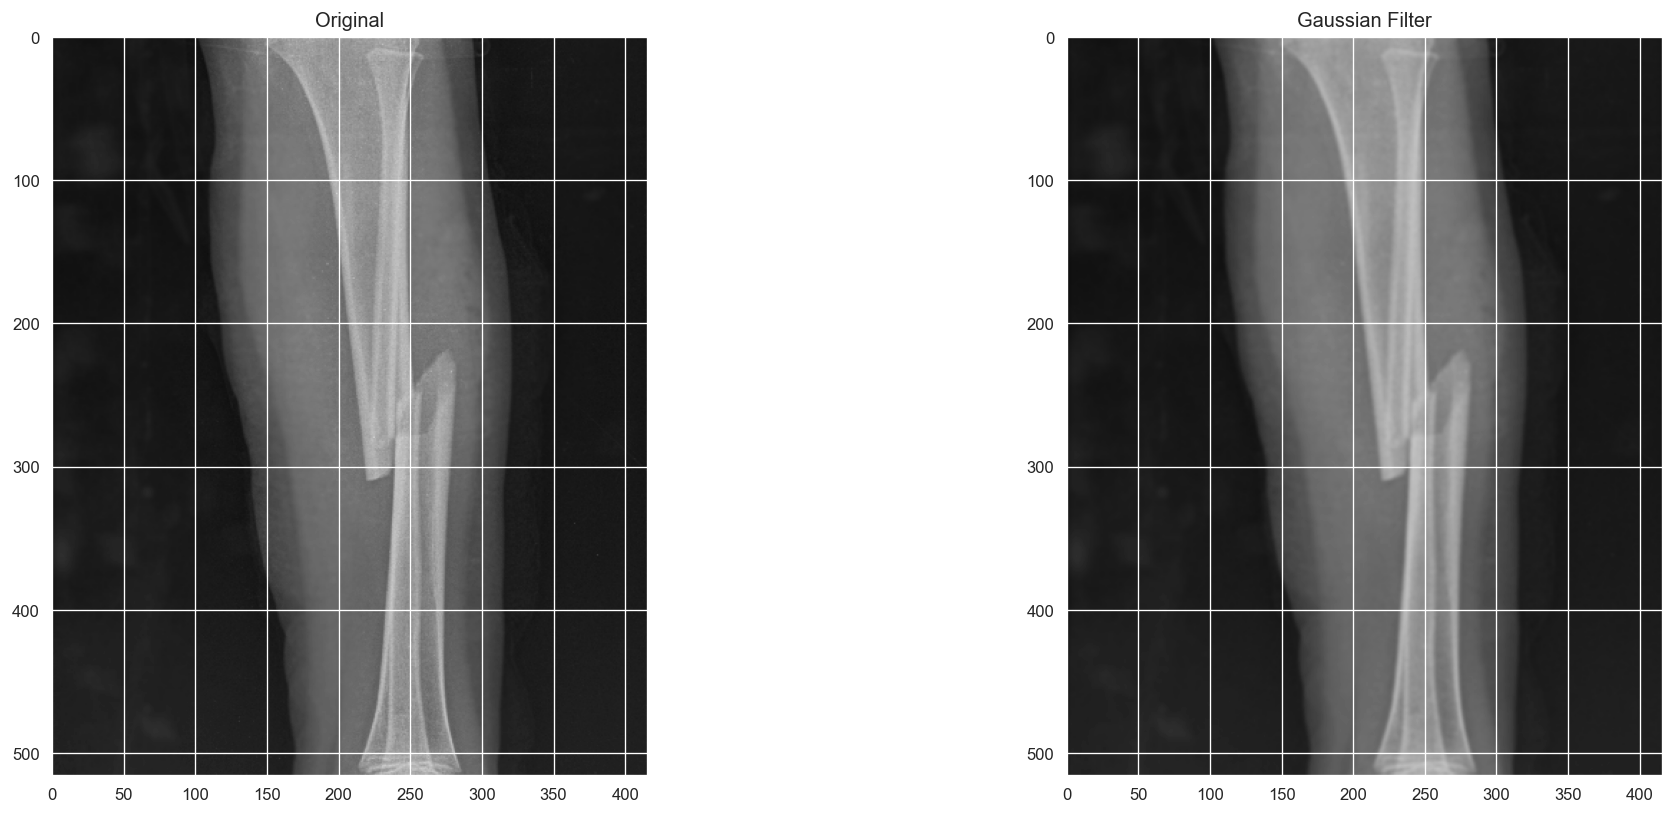

In [1]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../../images/sample3.jpg', 0)

gauss = cv2.GaussianBlur(img, (5, 5), 0)

fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=120)
ax[1].set_title("Gaussian Filter")
ax[1].imshow(gauss, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

## 1.2 Adaptive Histogram
[reference](https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2)

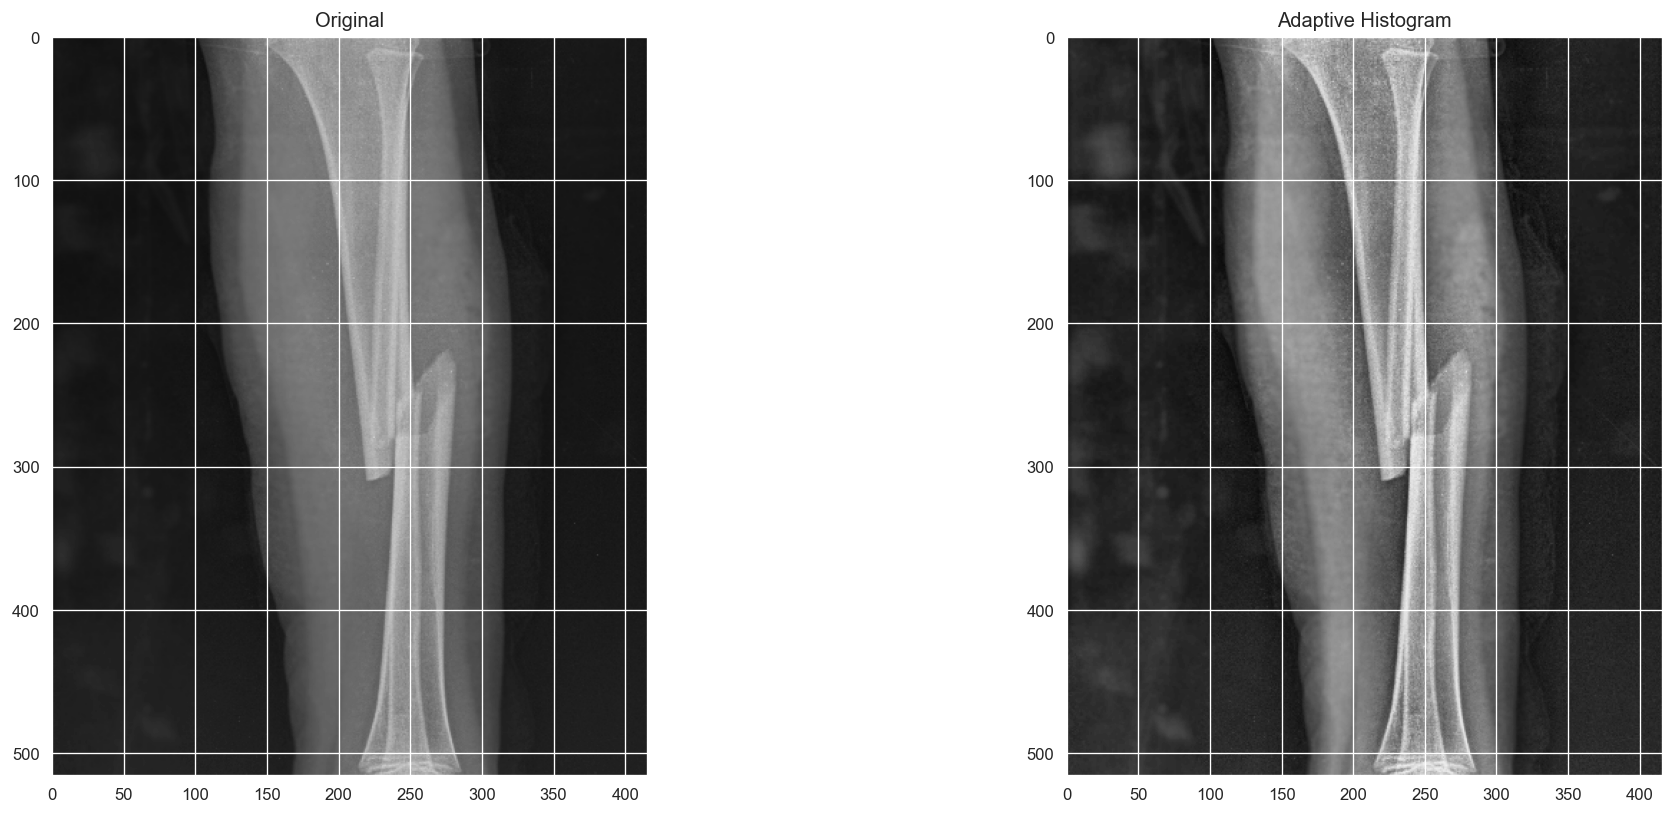

In [2]:
# Histogram Equalization
equalize_hist = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_hist = clahe.apply(img)

fge, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=120)
ax[1].set_title("Adaptive Histogram")
ax[1].imshow(adaptive_hist, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)


## 1.3 Canny Edge Detection

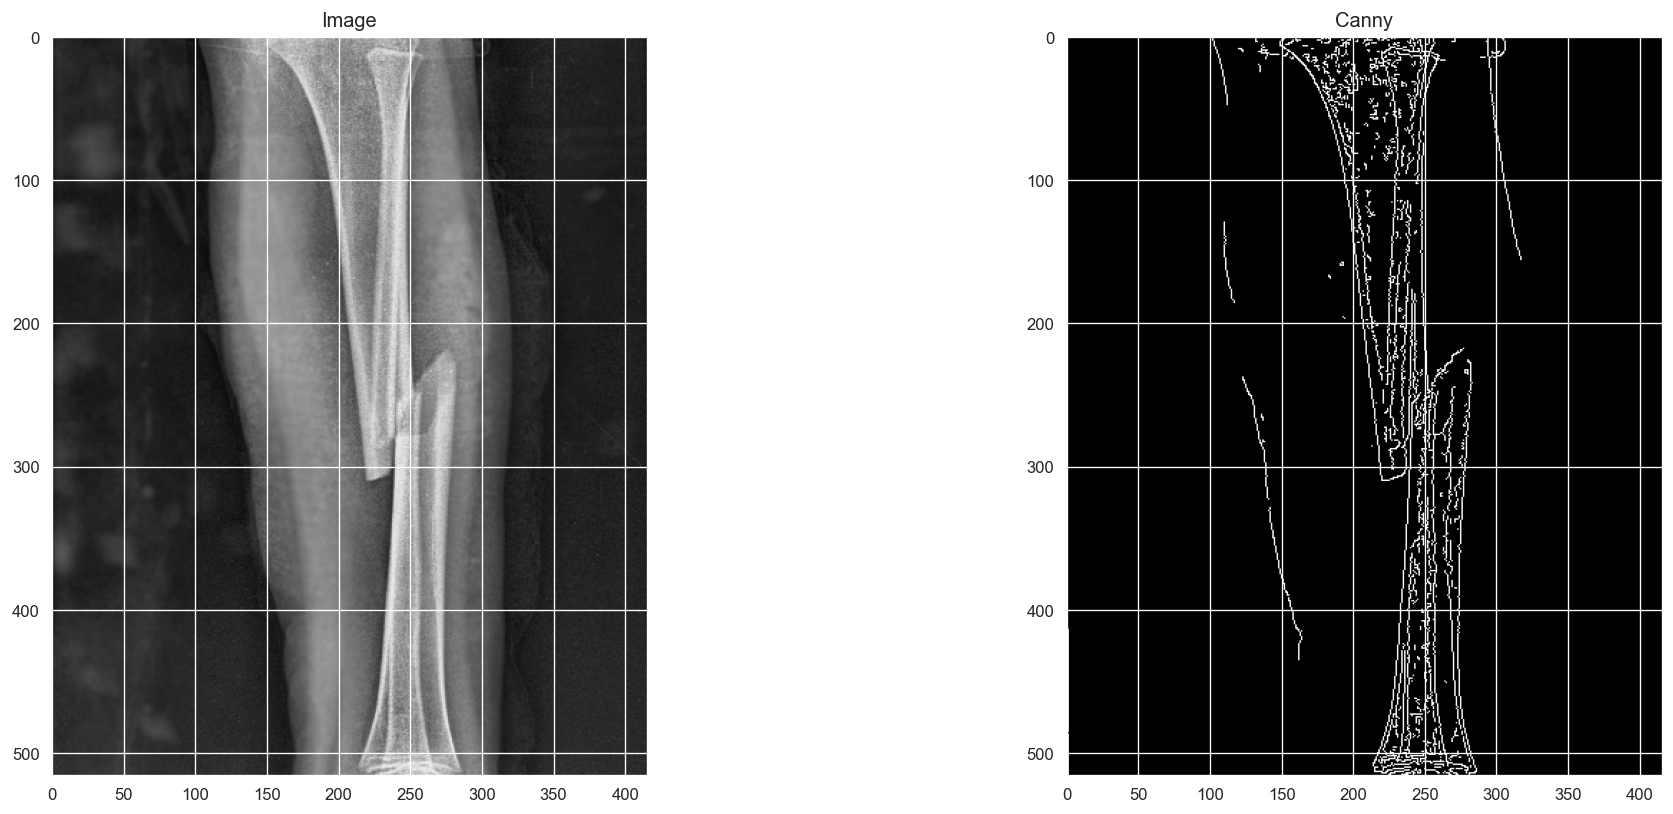

In [3]:
canny = cv2.Canny(adaptive_hist, 100, 150)

fgc, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=120)
ax[1].set_title("Canny")
ax[1].imshow(canny, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Image")
ax[0].imshow(adaptive_hist, cmap='gray', vmin=0, vmax=255)

# 2 Feature Extraction
## 2.1 Gray-Level Co-occurrence Matrix(GLCM)

In [4]:
from src.models.glcm import GLCM
import numpy as np
import cv2

img = cv2.imread('../../images/sample1.jpg', 0)

features = GLCM(np.array(np.array(img)))
image_data = features.glcm_all()
####################################################################
print(image_data)

[2.05299727e-01 2.05244584e-01 2.08432115e-01 2.05483032e-01
 2.05244584e-01 2.08432115e-01 2.05483032e-01 1.98061455e-01
 2.01344223e-01 2.07803037e-01 2.01327080e-01 2.01344223e-01
 2.07803037e-01 2.01327080e-01 1.92001879e-01 1.94984380e-01
 2.06917707e-01 1.94677961e-01 1.94984380e-01 2.06917707e-01
 1.94677961e-01 1.83023342e-01 1.89598787e-01 2.05869171e-01
 1.89297966e-01 1.89598787e-01 2.05869171e-01 1.89297966e-01
 9.94051657e-01 9.93229203e-01 9.96567316e-01 9.93679701e-01
 9.93229203e-01 9.96567316e-01 9.93679701e-01 9.81040996e-01
 9.86782352e-01 9.94859381e-01 9.87782761e-01 9.86782352e-01
 9.94859381e-01 9.87782761e-01 9.67400801e-01 9.72345175e-01
 9.93226876e-01 9.74625302e-01 9.72345175e-01 9.93226876e-01
 9.74625302e-01 9.42649185e-01 9.58519750e-01 9.89933697e-01
 9.61511582e-01 9.58519750e-01 9.89933697e-01 9.61511582e-01
 3.55673726e+00 3.80210098e+00 2.91498663e+00 3.71704821e+00
 3.80210098e+00 2.91498663e+00 3.71704821e+00 5.69343109e+00
 4.88776541e+00 3.431115

# 3. Machine Learning Algorithms
## 3.1 Machine Learning Comparison Table for All Algorithms and datasets

In [5]:
from src.models.preprocessors import Filter
from src.models.bone_fracture import FractureDetector
from src.models.print import print_table

filters = [Filter.gaussian, Filter.adaptive_hist, Filter.canny]

print("ML Comparison Table")
print_table(FractureDetector.train_and_test(filters))


ML Comparison Table


/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

╒═══════════╤═══════════════════╤═════════════╤══════════╤════════════╕
│ Dataset   │ ML Algorithm      │   Precision │   Recall │   Accuracy │
╞═══════════╪═══════════════════╪═════════════╪══════════╪════════════╡
│ EEEH      │ Svm               │    0.926339 │ 0.928571 │   0.928571 │
├───────────┼───────────────────┼─────────────┼──────────┼────────────┤
│ Roboflow  │ Svm               │    0.865548 │ 0.930348 │   0.930348 │
├───────────┼───────────────────┼─────────────┼──────────┼────────────┤
│ EEEH      │ Decision Tree     │    0.827434 │ 0.803571 │   0.803571 │
├───────────┼───────────────────┼─────────────┼──────────┼────────────┤
│ Roboflow  │ Decision Tree     │    0.903443 │ 0.920398 │   0.920398 │
├───────────┼───────────────────┼─────────────┼──────────┼────────────┤
│ EEEH      │ Naive Bayes       │    0.773491 │ 0.642857 │   0.642857 │
├───────────┼───────────────────┼─────────────┼──────────┼────────────┤
│ Roboflow  │ Naive Bayes       │    0.873345 │ 0.457711 │   0.4

/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa